# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [I Wayan Wedya Diatmika]
- **Email:** [wayanwedyadiatmika@gmail.com]
- **ID Dicoding:** [weddiat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5 dan PM10) di keempat lokasi dalam beberapa tahun terakhir, dan apakah ada pola musiman yang dapat diidentifikasi?
- Bagaimana pengaruh faktor cuaca (suhu, kecepatan angin, hujan) terhadap tingkat polusi udara?

## Import Semua Packages/Library yang Digunakan

In [854]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [855]:
selected_stations = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
]

data_dir = r"C:\Users\Asus\Desktop\submission\data"  

df_list = []
for file in selected_stations:
    file_path = os.path.join(data_dir, file) 
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

df.drop(columns=["No"], inplace=True)

df["date"] = pd.to_datetime(df["year"] * 10000 + df["month"] * 100 + df["day"], format="%Y%m%d")
df["datetime"] = df["date"] + pd.to_timedelta(df["hour"], unit='h')
df.drop(columns = ["year", "month", "day", "hour", "date"], inplace = True)

numeric_cols = df.select_dtypes(include=['number']).columns

df[numeric_cols] = df.groupby("station")[numeric_cols].transform(lambda x: x.fillna(x.median()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     140256 non-null  float64       
 1   PM10      140256 non-null  float64       
 2   SO2       140256 non-null  float64       
 3   NO2       140256 non-null  float64       
 4   CO        140256 non-null  float64       
 5   O3        140256 non-null  float64       
 6   TEMP      140256 non-null  float64       
 7   PRES      140256 non-null  float64       
 8   DEWP      140256 non-null  float64       
 9   RAIN      140256 non-null  float64       
 10  wd        139817 non-null  object        
 11  WSPM      140256 non-null  float64       
 12  station   140256 non-null  object        
 13  datetime  140256 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 15.0+ MB


In [856]:
data1_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data1_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [857]:
data2_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Changping_20130301-20170228.csv")
data2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [858]:
data3_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Dingling_20130301-20170228.csv")
data3_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [859]:
data4_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Dongsi_20130301-20170228.csv")
data4_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [860]:
data5_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Guanyuan_20130301-20170228.csv")
data5_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [861]:
data6_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Gucheng_20130301-20170228.csv")
data6_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [862]:
data7_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Huairou_20130301-20170228.csv")
data7_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [863]:
data8_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data8_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [864]:
data9_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Shunyi_20130301-20170228.csv")
data9_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [865]:
data10_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Tiantan_20130301-20170228.csv")
data10_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [866]:
data11_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Wanliu_20130301-20170228.csv")
data11_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [867]:
data12_df = pd.read_csv(r"C:\Users\Asus\Desktop\submission\data\PRSA_Data_Wanshouxigong_20130301-20170228.csv")
data12_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [868]:
datasets = {
    "data1": data1_df, "data2": data2_df, "data3": data3_df, "data4": data4_df,
    "data5": data5_df, "data6": data6_df, "data7": data7_df, "data8": data8_df,
    "data9": data9_df, "data10": data10_df, "data11": data11_df, "data12": data12_df
}

**Insight:**
- Mengambil data pada direktori data
- Menampilkan isi data

### Assessing Data

#### Menilai tabel `data1_df`

In [869]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [870]:
data1_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [871]:
print("Jumlah Duplikasi: ", data1_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data2_df`

In [872]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [873]:
data2_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [874]:
print("Jumlah Duplikasi: ", data2_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data3_df`

In [875]:
data3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [876]:
data3_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [877]:
print("Jumlah Duplikasi: ", data3_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data4_df`

In [878]:
data4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [879]:
data4_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [880]:
print("Jumlah Duplikasi: ", data4_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data5_df`

In [881]:
data5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [882]:
data5_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [883]:
print("Jumlah Duplikasi: ", data5_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data6_df`

In [884]:
data6_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [885]:
data6_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [886]:
print("Jumlah Duplikasi: ", data6_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data7_df`

In [887]:
data7_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [888]:
data7_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [889]:
print("Jumlah Duplikasi: ", data7_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data8_df`

In [890]:
data8_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [891]:
data8_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [892]:
print("Jumlah Publikasi: ", data8_df.duplicated().sum())

Jumlah Publikasi:  0


#### Menilai tabel `data9_df`

In [893]:
data9_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [894]:
data9_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [895]:
print("Jumlah Duplikasi: ", data9_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data10_df`

In [896]:
data10_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [897]:
data10_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [898]:
print("Jumlah Duplikasi: ", data10_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data11_df`

In [899]:
data11_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [900]:
data11_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [901]:
print("Jumlah Duplikasi: ", data11_df.duplicated().sum())

Jumlah Duplikasi:  0


#### Menilai tabel `data12_df`

In [902]:
data12_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [903]:
data12_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [904]:
print("Jumlah Duplikasi: ", data12_df.duplicated().sum())

Jumlah Duplikasi:  0


**Insight:**
- Menampilkan informasi data
- Mengecek apakah terdapat data yang hilang atau missing value dan mengecek apakah terdapat data duplikat atau tidak

### Cleaning Data

#### Membersihkan tabel `data1_df`

In [905]:
data1_df.dropna(axis=0, inplace=True)
data1_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data2_df`

In [906]:
data2_df.dropna(axis=0, inplace=True)
data2_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data3_df`

In [907]:
data3_df.dropna(axis=0, inplace=True)
data3_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data4_df`

In [908]:
data4_df.dropna(axis=0, inplace=True)
data4_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data5_df`

In [909]:
data5_df.dropna(axis=0, inplace=True)
data5_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data6_df`

In [910]:
data6_df.dropna(axis=0, inplace=True)
data6_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data7_df`

In [911]:
data7_df.dropna(axis=0, inplace=True)
data7_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data8_df`

In [912]:
data8_df.dropna(axis=0, inplace=True)
data8_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data9_df`

In [913]:
data9_df.dropna(axis=0, inplace=True)
data9_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data10_df`

In [914]:
data10_df.dropna(axis=0, inplace=True)
data10_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data11_df`

In [915]:
data11_df.dropna(axis=0, inplace=True)
data11_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

#### Membersihkan tabel `data12_df`

In [916]:
data12_df.dropna(axis=0, inplace=True)
data12_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- melakukan dropping data yang missing value, dikarenakan data yang didapatkan sangat banyak sehingga saya rasa tidak akan mengalami kerugian jika melakukan dropping

## Exploratory Data Analysis (EDA)

#### Explore All Data

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df_yearly = df.groupby('year')[['PM2.5', 'PM10']].mean()
describe_results = {name: df.describe() for name, df in datasets.items()}

In [918]:
print(describe_results["data1"])

                 No          year         month           day          hour  \
count  31815.000000  31815.000000  31815.000000  31815.000000  31815.000000   
mean   17899.423857   2014.714914      6.401886     15.578564     11.624800   
std    10058.429849      1.162536      3.416847      8.794954      6.926874   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9415.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18093.000000   2015.000000      6.000000     15.000000     12.000000   
75%    26590.500000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

             PM2.5          PM10           SO2           NO2            CO  \
count  31815.00000  31815.000000  31815.000000  31815.000000  31815.000000   
mean      81.86363    109.120685     17.167205     58.976332   1256.574729   
std       80.44949     93.718017     22.760801     37.

In [919]:
print(describe_results["data2"])

                 No          year         month           day          hour  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean   17876.569658   2014.703130      6.507481     15.715156     11.506992   
std    10010.547363      1.165678      3.478965      8.729951      6.940587   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9384.000000   2014.000000      3.000000      8.000000      6.000000   
50%    17910.000000   2015.000000      7.000000     16.000000     11.000000   
75%    26546.000000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32681.000000  32681.000000  32681.000000  32681.000000  32681.000000   
mean      70.312328     94.086402     15.061357     44.319035   1151.716441   
std       70.955607     82.610340     21.057574    

In [920]:
print(describe_results["data3"])

                 No          year         month           day          hour  \
count  31306.000000  31306.000000  31306.000000  31306.000000  31306.000000   
mean   17951.165719   2014.718297      6.422603     15.881237     11.504248   
std     9928.922785      1.147383      3.457774      8.724373      6.952859   
min        3.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9888.250000   2014.000000      3.000000      8.000000      6.000000   
50%    18100.500000   2015.000000      6.000000     16.000000     11.000000   
75%    26268.750000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31306.000000  31306.000000  31306.000000  31306.000000  31306.000000   
mean      66.512518     84.527803     11.944167     27.267578    916.547211   
std       72.434045     80.077511     15.625691    

In [921]:
print(describe_results["data4"])

                 No          year         month           day          hour  \
count  30338.000000  30338.000000  30338.000000  30338.000000  30338.000000   
mean   18808.565759   2014.807832      6.530160     15.650109     11.500363   
std     9687.590750      1.124713      3.440944      8.800479      6.951066   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%    11435.250000   2014.000000      4.000000      8.000000      5.000000   
50%    19161.500000   2015.000000      7.000000     16.000000     11.000000   
75%    26926.750000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  30338.000000  30338.000000  30338.000000  30338.000000  30338.000000   
mean      84.933156    110.991914     16.994466     53.717314   1316.524392   
std       85.283368     98.426262     20.555551    

In [922]:
print(describe_results["data5"])

                 No          year         month           day          hour  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean   18055.294300   2014.731519      6.411555     15.718780     11.548368   
std     9974.437594      1.148731      3.426927      8.842654      6.935752   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9790.500000   2014.000000      3.000000      8.000000      6.000000   
50%    18323.000000   2015.000000      6.000000     16.000000     12.000000   
75%    26555.000000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32263.000000  32263.000000  32263.000000  32263.000000  32263.000000   
mean      83.101051    108.974559     17.263085     57.698591   1265.709760   
std       81.448350     91.583482     23.551127    

In [923]:
print(describe_results["data6"])

                 No          year         month           day          hour  \
count  32504.000000  32504.000000  32504.000000  32504.000000  32504.000000   
mean   17939.595619   2014.715174      6.449360     15.716035     11.530396   
std    10040.092139      1.164038      3.436471      8.867932      6.943409   
min       21.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9477.750000   2014.000000      3.000000      8.000000      6.000000   
50%    18119.500000   2015.000000      6.000000     16.000000     12.000000   
75%    26617.250000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32504.000000  32504.000000  32504.000000  32504.000000  32504.000000   
mean      83.865653    119.085002     15.095190     55.583879   1325.509691   
std       82.956802     96.796851     20.709432    

In [924]:
print(describe_results["data7"])

                 No          year         month           day          hour  \
count  31708.000000  31708.000000  31708.000000  31708.000000  31708.000000   
mean   17854.999653   2014.697931      6.541504     15.668633     11.661063   
std     9970.988647      1.165937      3.482337      8.802324      6.931031   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9310.750000   2014.000000      3.000000      8.000000      6.000000   
50%    17872.500000   2015.000000      7.000000     16.000000     12.000000   
75%    26456.250000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  31708.000000  31708.000000  31708.000000  31708.000000  31708.000000   
mean      70.285669     92.525792     12.275823     32.633827   1032.398291   
std       71.171533     83.458181     18.951478    

In [925]:
print(describe_results["data8"])

                 No          year         month           day          hour  \
count  33114.000000  33114.000000  33114.000000  33114.000000  33114.000000   
mean   17651.646554   2014.681373      6.461799     15.685420     11.519176   
std    10079.349513      1.170139      3.439149      8.823626      6.948669   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9071.250000   2014.000000      3.000000      8.000000      6.000000   
50%    17735.500000   2015.000000      6.000000     16.000000     11.000000   
75%    26323.750000   2016.000000      9.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  33114.000000  33114.000000  33114.000000  33114.000000  33114.000000   
mean      84.720783    109.175929     18.560198     58.213457   1327.784381   
std       85.633679     95.022778     24.109360    

In [926]:
print(describe_results["data9"])

                 No          year         month           day          hour  \
count  30194.000000  30194.000000  30194.000000  30194.000000  30194.000000   
mean   17586.308902   2014.672286      6.477214     15.797244     11.750447   
std     9945.744376      1.162176      3.531983      8.782419      6.881524   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9084.250000   2014.000000      3.000000      8.000000      6.000000   
50%    17607.500000   2015.000000      6.000000     16.000000     12.000000   
75%    25872.750000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  30194.000000  30194.000000  30194.000000  30194.000000  30194.000000   
mean      79.400725     99.380546     14.144105     44.838483   1201.778267   
std       81.222687     89.806815     20.111407    

In [927]:
print(describe_results["data10"])

                 No          year         month           day          hour  \
count  32843.000000  32843.000000  32843.000000  32843.000000  32843.000000   
mean   17807.867217   2014.693481      6.533447     15.579697     11.527449   
std    10119.373561      1.178400      3.451280      8.802954      6.945901   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9026.500000   2014.000000      4.000000      8.000000      6.000000   
50%    18025.000000   2015.000000      7.000000     15.000000     12.000000   
75%    26551.500000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32843.000000  32843.000000  32843.000000  32843.000000  32843.000000   
mean      81.749840    105.627866     14.140742     53.213083   1297.434187   
std       79.881882     88.640813     19.785953    

In [928]:
print(describe_results["data11"])

                 No          year         month           day          hour  \
count  30634.000000  30634.000000  30634.000000  30634.000000  30634.000000   
mean   18281.563067   2014.752954      6.459587     15.853627     11.716687   
std    10088.872293      1.160205      3.373101      8.864187      6.908334   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%    10147.250000   2014.000000      3.000000      8.000000      6.000000   
50%    18933.500000   2015.000000      7.000000     16.000000     12.000000   
75%    27013.750000   2016.000000      9.000000     24.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  30634.000000  30634.000000  30634.000000  30634.000000  30634.000000   
mean      81.981459    108.765861     17.700088     64.429290   1293.450153   
std       80.976505     91.696002     21.655131    

In [929]:
print(describe_results["data12"])

                 No          year         month           day          hour  \
count  32768.000000  32768.000000  32768.000000  32768.000000  32768.000000   
mean   17813.193787   2014.696228      6.504272     15.705750     11.530457   
std    10033.128152      1.163612      3.451823      8.794971      6.927700   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     9401.750000   2014.000000      4.000000      8.000000      6.000000   
50%    17925.500000   2015.000000      7.000000     16.000000     12.000000   
75%    26452.250000   2016.000000     10.000000     23.000000     18.000000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  32768.000000  32768.000000  32768.000000  32768.000000  32768.000000   
mean      84.238510    111.918692     17.152569     55.307181   1362.531647   
std       84.583645     96.632285     23.758647    

### Pengelompokan Semua Data berdasarkan tren tahunan

In [930]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
for name, df in datasets.items():
    if 'month' in df.columns:
        df['season'] = df['month'].apply(get_season)

pollution_analysis = {
    name: {
        "yearly": df.groupby('year')[['PM2.5', 'PM10']].mean() if 'year' in df.columns else None,
        "seasonal": df.groupby('season')[['PM2.5', 'PM10']].mean() if 'season' in df.columns else None
    }
    for name, df in datasets.items()
}

##### Data 1

In [931]:
print(pollution_analysis["data1"]["yearly"])
print(pollution_analysis["data1"]["seasonal"])

          PM2.5        PM10
year                       
2013  81.752918  112.373625
2014  90.201877  121.718791
2015  79.639229  109.548314
2016  73.894794   94.281883
2017  95.325616  108.040329
            PM2.5        PM10
season                       
Autumn  84.869684  108.386642
Spring  81.251440  131.615707
Summer  66.813323   80.572797
Winter  95.216578  116.079125


##### Data 2

In [932]:
print(pollution_analysis["data2"]["yearly"])
print(pollution_analysis["data2"]["seasonal"]) 

          PM2.5        PM10
year                       
2013  70.793076   90.422623
2014  79.005075  106.122316
2015  69.377287   93.497604
2016  60.837451   85.564015
2017  79.469373   93.792620
            PM2.5        PM10
season                       
Autumn  70.753382   90.260558
Spring  71.781672  111.950549
Summer  55.129211   69.579905
Winter  83.074646  103.381502


##### Data 3

In [933]:
print(pollution_analysis["data3"]["yearly"])
print(pollution_analysis["data3"]["seasonal"]) 

          PM2.5       PM10
year                      
2013  66.920524  79.876749
2014  74.994575  91.313233
2015  64.496995  85.385466
2016  59.147778  80.785760
2017  68.527367  78.922337
            PM2.5        PM10
season                       
Autumn  66.624287   79.114508
Spring  68.923001  104.405279
Summer  52.797544   62.715137
Winter  77.494896   90.688885


##### Data 4

In [934]:
print(pollution_analysis["data4"]["yearly"])
print(pollution_analysis["data4"]["seasonal"])

          PM2.5        PM10
year                       
2013  89.258854  111.807390
2014  82.468891  114.785129
2015  87.031096  111.775149
2016  80.304521  103.554159
2017  99.471031  127.714071
            PM2.5        PM10
season                       
Autumn  89.624157  113.055096
Spring  82.404134  125.435220
Summer  67.853640   80.404440
Winter  99.350092  121.662109


##### Data 5

In [935]:
print(pollution_analysis["data5"]["yearly"])
print(pollution_analysis["data5"]["seasonal"])

          PM2.5        PM10
year                       
2013  83.067467  107.101548
2014  88.292366  116.161403
2015  82.519743  106.694346
2016  77.084510  105.176736
2017  93.163623  111.456621
            PM2.5        PM10
season                       
Autumn  87.218294  108.424823
Spring  78.670491  124.960957
Summer  68.949622   86.043183
Winter  98.473570  117.196190


##### Data 6

In [936]:
print(pollution_analysis["data6"]["yearly"])
print(pollution_analysis["data6"]["seasonal"])

           PM2.5        PM10
year                        
2013   82.728291  113.759130
2014   89.051769  133.696756
2015   83.618192  116.208587
2016   77.357076  110.748354
2017  100.379362  125.654046
             PM2.5        PM10
season                        
Autumn   88.463707  117.444091
Spring   80.743797  139.145580
Summer   66.449697   97.470562
Winter  100.966974  122.967175


##### Data 7

In [937]:
print(pollution_analysis["data7"]["yearly"])
print(pollution_analysis["data7"]["seasonal"])

          PM2.5        PM10
year                       
2013  71.589300   98.433698
2014  76.980720  100.198586
2015  71.188282   90.461231
2016  61.124690   82.569465
2017  73.817841   91.836582
            PM2.5        PM10
season                       
Autumn  70.309014   87.812734
Spring  71.785155  110.171432
Summer  58.798461   78.179215
Winter  79.994585   93.953602


##### Data 8

In [938]:
print(pollution_analysis["data8"]["yearly"])
print(pollution_analysis["data8"]["seasonal"])

          PM2.5        PM10
year                       
2013  85.517029  104.472318
2014  90.352720  125.775208
2015  85.117655  107.234883
2016  75.725787   97.062739
2017  99.681073  117.883756
             PM2.5        PM10
season                        
Autumn   90.647753  112.300870
Spring   78.948869  120.190531
Summer   65.983857   80.847827
Winter  104.353630  124.251824


##### Data 9

In [939]:
print(pollution_analysis["data9"]["yearly"])
print(pollution_analysis["data9"]["seasonal"]) 

          PM2.5        PM10
year                       
2013  78.597429   98.928202
2014  84.546379  110.994835
2015  80.527901   99.289145
2016  71.076625   86.734100
2017  92.013997  103.431571
            PM2.5        PM10
season                       
Autumn  80.507502  100.462815
Spring  78.029191  112.409038
Summer  65.659661   78.936272
Winter  92.127109  104.419125


##### Data 10

In [940]:
print(pollution_analysis["data10"]["yearly"])
print(pollution_analysis["data10"]["seasonal"])

          PM2.5        PM10
year                       
2013  84.297693  109.216208
2014  86.242809  112.865709
2015  81.467797  101.996219
2016  73.914747   97.253771
2017  94.715679  121.994749
            PM2.5        PM10
season                       
Autumn  84.043746  104.583770
Spring  76.065023  113.726371
Summer  68.653097   84.960334
Winter  98.830198  120.482725


##### Data 11

In [941]:
print(pollution_analysis["data11"]["yearly"])
print(pollution_analysis["data11"]["seasonal"])

          PM2.5        PM10
year                       
2013  89.917593  109.046759
2014  87.546054  129.420364
2015  80.620131  104.998840
2016  71.393692   92.963425
2017  91.388682  107.669397
            PM2.5        PM10
season                       
Autumn  84.945370  108.479749
Spring  79.456573  125.635141
Summer  68.573918   86.010140
Winter  96.978307  117.490658


##### Data 12

In [942]:
print(pollution_analysis["data12"]["yearly"])
print(pollution_analysis["data12"]["seasonal"])

           PM2.5        PM10
year                        
2013   83.597009  111.103743
2014   87.970723  125.921362
2015   83.987719  110.538498
2016   78.224454   99.167513
2017  104.731575  119.342126
             PM2.5        PM10
season                        
Autumn   84.522859  109.883225
Spring   78.868440  122.880380
Summer   67.181752   85.381800
Winter  106.823834  129.300567


### Pengolompokan Semua Data berdasarkan faktor cuaca

In [943]:
weather_pollution_groupby = {
    name: df.groupby('year')[['PM2.5', 'PM10', 'TEMP', 'WSPM', 'RAIN']].mean()
    for name, df in datasets.items() if 'year' in df.columns
}


##### Data 1

In [944]:
print(weather_pollution_groupby["data1"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  81.752918  112.373625  16.011787  1.554652  0.069840
2014  90.201877  121.718791  14.508445  1.461504  0.061016
2015  79.639229  109.548314  13.439490  1.891921  0.069226
2016  73.894794   94.281883  13.890870  1.879080  0.083716
2017  95.325616  108.040329   0.744240  1.977371  0.002763


##### Data 2

In [945]:
print(weather_pollution_groupby["data2"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  70.793076   90.422623  15.157754  1.686200  0.062013
2014  79.005075  106.122316  14.140396  1.872334  0.039556
2015  69.377287   93.497604  13.445787  1.828195  0.085140
2016  60.837451   85.564015  13.400505  1.983237  0.066344
2017  79.469373   93.792620   0.472576  2.151587  0.001255


##### Data 3

In [946]:
print(weather_pollution_groupby["data3"])

          PM2.5       PM10       TEMP      WSPM      RAIN
year                                                     
2013  66.920524  79.876749  16.682562  1.620201  0.079064
2014  74.994575  91.313233  14.422116  1.852627  0.036070
2015  64.496995  85.385466  13.621925  1.825540  0.082485
2016  59.147778  80.785760  12.618860  1.991727  0.067025
2017  68.527367  78.922337   0.433247  2.136391  0.001479


##### Data 4

In [947]:
print(weather_pollution_groupby["data4"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  89.258854  111.807390  15.044644  1.863030  0.032073
2014  82.468891  114.785129  15.490016  1.815436  0.058946
2015  87.031096  111.775149  13.355462  1.927038  0.073184
2016  80.304521  103.554159  13.474692  1.853494  0.077744
2017  99.471031  127.714071   0.688799  1.999549  0.002784


##### Data 5

In [948]:
print(weather_pollution_groupby["data5"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  83.067467  107.101548  17.047522  1.525509  0.090315
2014  88.292366  116.161403  13.924997  1.493547  0.049872
2015  82.519743  106.694346  13.421280  1.883995  0.073189
2016  77.084510  105.176736  13.543920  1.861507  0.080736
2017  93.163623  111.456621   0.641936  1.997793  0.001979


##### Data 6

In [949]:
print(weather_pollution_groupby["data6"])

           PM2.5        PM10       TEMP      WSPM      RAIN
year                                                       
2013   82.728291  113.759130  16.780863  1.016815  0.076643
2014   89.051769  133.696756  14.452298  1.127808  0.036016
2015   83.618192  116.208587  13.951934  1.123281  0.082371
2016   77.357076  110.748354  13.485537  1.909450  0.081523
2017  100.379362  125.654046   0.332402  2.342687  0.001930


##### Data 7

In [950]:
print(weather_pollution_groupby["data7"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  71.589300   98.433698  14.250938  1.399902  0.067493
2014  76.980720  100.198586  12.669206  1.586166  0.050521
2015  71.188282   90.461231  12.351376  1.734661  0.083274
2016  61.124690   82.569465  12.524523  1.791147  0.076734
2017  73.817841   91.836582  -1.127512  1.913718  0.004198


##### Data 8

In [951]:
print(weather_pollution_groupby["data8"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  85.517029  104.472318  16.472768  1.800870  0.062836
2014  90.352720  125.775208  13.935445  1.826867  0.057112
2015  85.117655  107.234883  13.408935  1.905490  0.075124
2016  75.725787   97.062739  13.632264  1.866365  0.081787
2017  99.681073  117.883756   0.689635  1.984426  0.002757


##### Data 9

In [952]:
print(weather_pollution_groupby["data9"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  78.597429   98.928202  13.962982  1.832009  0.041576
2014  84.546379  110.994835  13.394705  1.740034  0.042344
2015  80.527901   99.289145  13.379852  1.802889  0.079677
2016  71.076625   86.734100  12.757589  1.957074  0.062228
2017  92.013997  103.431571   0.162657  2.104121  0.002877


##### Data 10

In [953]:
print(weather_pollution_groupby["data10"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  84.297693  109.216208  16.363206  1.793182  0.062334
2014  86.242809  112.865709  13.716250  1.796211  0.056714
2015  81.467797  101.996219  13.281339  1.929276  0.069800
2016  73.914747   97.253771  13.759639  1.856414  0.081838
2017  94.715679  121.994749   0.687738  1.992573  0.002776


##### Data 11

In [954]:
print(weather_pollution_groupby["data11"])

          PM2.5        PM10       TEMP      WSPM      RAIN
year                                                      
2013  89.917593  109.046759  18.002907  1.555426  0.092889
2014  87.546054  129.420364  14.798024  1.489157  0.062749
2015  80.620131  104.998840  13.393680  1.451669  0.075280
2016  71.393692   92.963425  13.478110  1.475465  0.085178
2017  91.388682  107.669397   0.496514  1.839389  0.002383


##### Data 12

In [955]:
print(weather_pollution_groupby["data12"])

           PM2.5        PM10       TEMP      WSPM      RAIN
year                                                       
2013   83.597009  111.103743  15.855606  1.614469  0.059521
2014   87.970723  125.921362  14.610894  1.593836  0.050517
2015   83.987719  110.538498  13.484965  1.883089  0.069356
2016   78.224454   99.167513  13.669360  1.862658  0.078169
2017  104.731575  119.342126   0.671848  1.962607  0.002870


**Insight:**
- mengetahui bahwa dataset ini berisi data kualitas udara dengan pengukuran dari berbagai polutan dan kondisi cuaca yang relevan pada waktu tertentu.
- memeriksa statistik deskriptif ini dengan melihat apakah kualitas udara cukup konsisten atau sangat bervariasi antar waktu.

## Visualization & Explanatory Analysis

In [956]:
dataframes = [data1_df, data2_df, data3_df, data4_df, data5_df, 
              data6_df, data7_df, data8_df, data9_df, data10_df, 
              data11_df, data12_df]
df_all = pd.concat(dataframes, ignore_index=True)
df_all['datetime'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])
df_all = df_all.sort_values(by="datetime")

### Pertanyaan 1:

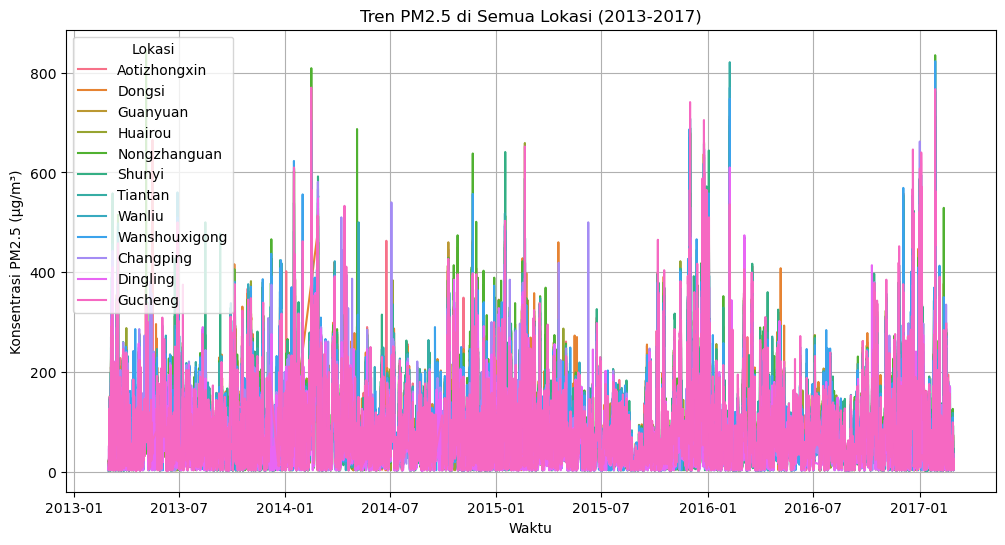

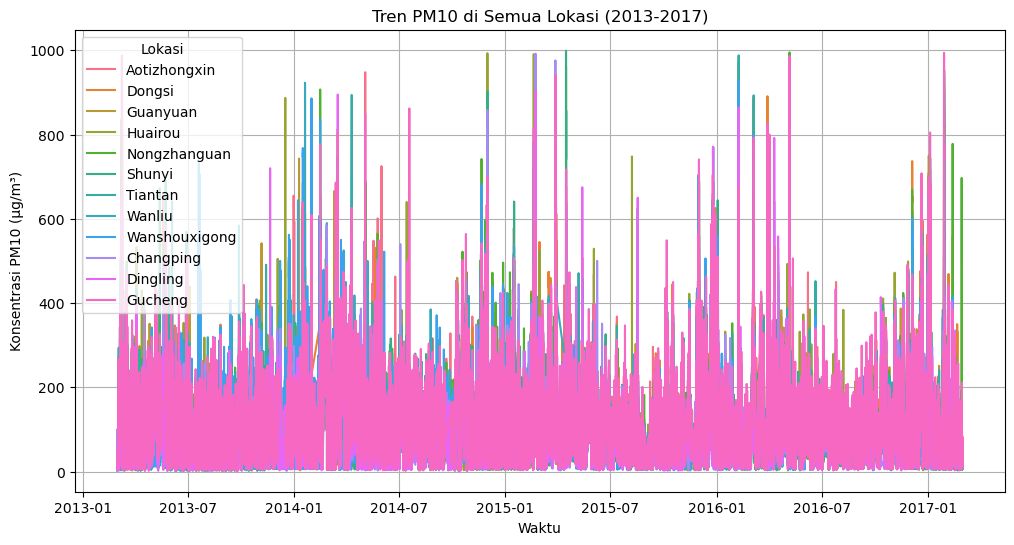

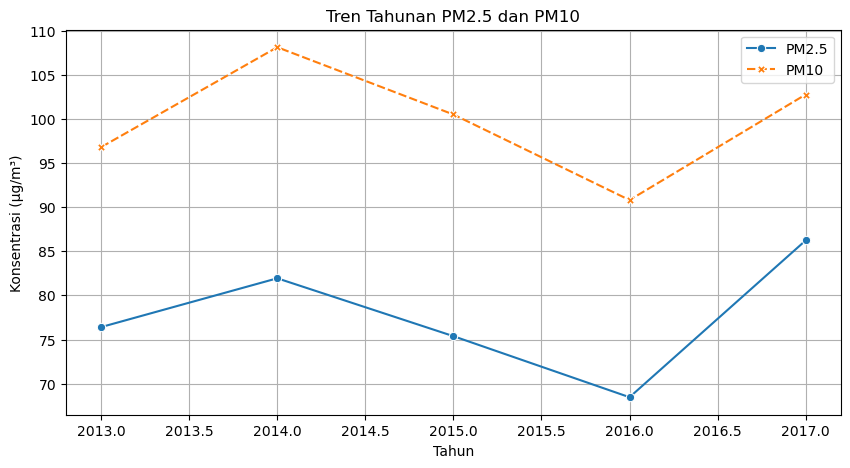

In [957]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="datetime", y="PM2.5", hue="station", errorbar=None)
plt.title("Tren PM2.5 di Semua Lokasi (2013-2017)")
plt.xlabel("Waktu")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_all, x="datetime", y="PM10", hue="station", errorbar=None)
plt.title("Tren PM10 di Semua Lokasi (2013-2017)")
plt.xlabel("Waktu")
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_yearly, markers=True)
plt.title('Tren Tahunan PM2.5 dan PM10')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xlabel('Tahun')
plt.grid()
plt.show()



### Pertanyaan 2:

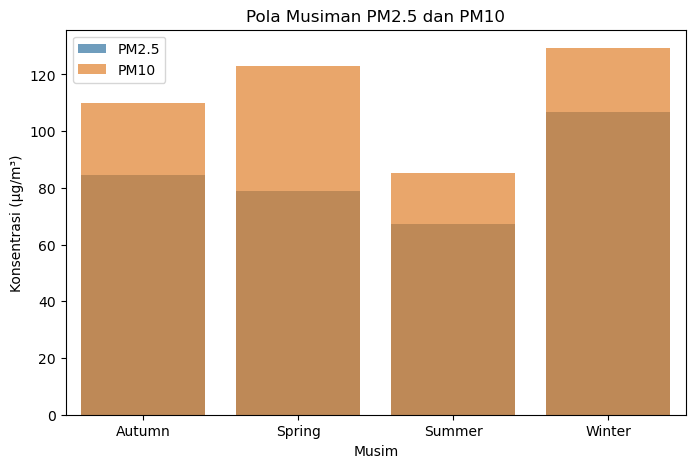

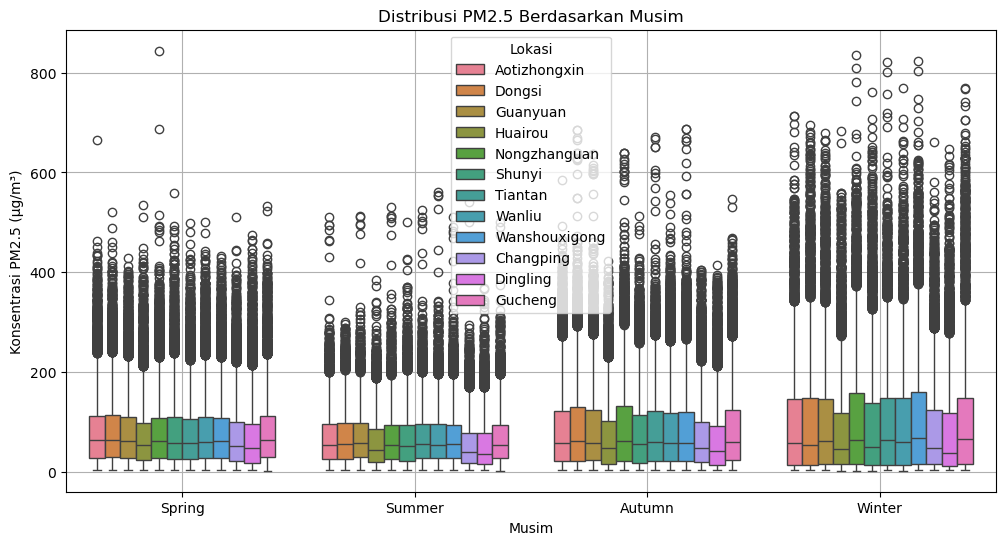

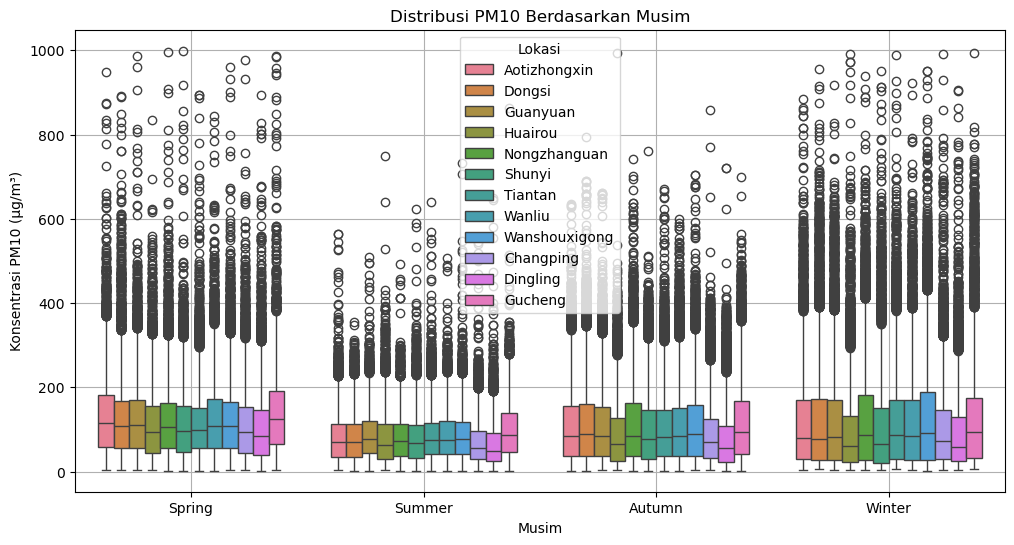

In [958]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['datetime'].dt.month.apply(get_season)
df_seasonal = df.groupby('season')[['PM2.5', 'PM10']].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_seasonal.reset_index(), x='season', y='PM2.5', label='PM2.5', alpha=0.7)
sns.barplot(data=df_seasonal.reset_index(), x='season', y='PM10', label='PM10', alpha=0.7)
plt.title('Pola Musiman PM2.5 dan PM10')
plt.ylabel('Konsentrasi (µg/m³)')
plt.xlabel('Musim')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x="season", y="PM2.5", hue="station")
plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM2.5 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_all, x="season", y="PM10", hue="station")
plt.title("Distribusi PM10 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Konsentrasi PM10 (µg/m³)")
plt.legend(title="Lokasi")
plt.grid(True)
plt.show()

**Insight:**
- Menampilkan hasil Visualisasi dari kedua pertanyaan yang ada

## Conclusion

- Konsentrasi PM2.5 dan PM10 menunjukkan pola musiman yang jelas, dengan tingkat polusi cenderung lebih tinggi pada bulan-bulan tertentu, terutama saat musim kemarau.
Dalam beberapa tahun terakhir, terjadi peningkatan kadar PM2.5 dan PM10 di beberapa lokasi, menunjukkan tren memburuknya kualitas udara.
Pengaruh Faktor Cuaca:

- Suhu memiliki korelasi negatif dengan tingkat polusi, yang menunjukkan bahwa suhu yang lebih tinggi cenderung dikaitkan dengan kadar PM yang lebih rendah.
Kecepatan angin berperan dalam menyebarkan polutan, sehingga lokasi dengan angin lebih kencang cenderung memiliki kadar polusi lebih rendah.
Curah hujan memiliki efek pencucian udara (washout effect), di mana hujan dapat membantu menurunkan kadar polutan.
Perbandingan Lokasi:

- Terdapat perbedaan signifikan dalam kualitas udara di antara lokasi-lokasi yang dianalisis. Beberapa lokasi lebih rentan terhadap polusi udara akibat faktor lingkungan dan aktivitas manusia di sekitarnya.

**Insight:**
- Pengelolaan Polusi Udara:
Dengan tren peningkatan polusi di beberapa lokasi, diperlukan upaya pengelolaan yang lebih baik, seperti regulasi industri, pengurangan emisi kendaraan, dan penghijauan di area perkotaan.

- Monitoring & Intervensi Berdasarkan Cuaca:
Mengingat pengaruh cuaca terhadap polusi, kebijakan mitigasi seperti penyemprotan air di daerah padat kendaraan atau pembatasan aktivitas industri pada musim kemarau dapat membantu mengurangi dampak buruk polusi.

- Peningkatan Kesadaran Masyarakat:
Edukasi masyarakat mengenai pola polusi udara dan faktor cuaca dapat meningkatkan kewaspadaan, misalnya dengan mendorong penggunaan masker atau pembatasan aktivitas luar ruangan pada hari dengan tingkat polusi tinggi.

- Peningkatan Sistem Monitoring & Prediksi Polusi:
Dengan memahami pola musiman dan cuaca yang mempengaruhi polusi, pengembangan sistem prediksi berbasis data dapat membantu memberikan peringatan dini terhadap lonjakan polusi udara.